In [3]:
import csv

def get_int(prompt):
    while True:
        try:
            return int(input(prompt))
        except ValueError:
            print("Error: Ingresa un número entero.")

def get_float(prompt):
    while True:
        try:
            return float(input(prompt))
        except ValueError:
            print("Error: Ingresa un número (entero o decimal).")

def get_uppercase(prompt):
    while True:
        s = input(prompt).strip()
        if s.isalpha() and s == s.upper():
            return s
        else:
            print("Error: Ingresa solo letras mayúsculas.")

def get_string(prompt):
    return input(prompt).strip()

def main():
    filas = []
    
    # Nodo INICIO
    inicio_j = 0
    filas.append({
        "Nodo": "INICIO",
        "Par ordenado (i,j)": f"({inicio_j},{inicio_j})",
        "Tiempo de actividad (t_i)": 0,
        "Predecesor": "",
        "Actividad": "INICIO"
    })
    
    # Variable global para asignar el nuevo "j" y diccionario para obtener la coordenada final de un nodo predecesor
    current_j = inicio_j
    pred_mapping = {"INICIO": inicio_j}
    
    # Se pide el número de nodos (actividades) intermedias (sin contar INICIO y FINAL)
    num_nodos = get_int("Ingrese el número de nodos (actividades): ")
    
    # Se recorre cada nodo a ingresar
    for idx in range(num_nodos):
        print(f"\n--- Ingreso de datos para la actividad {idx+1} ---")
        nodo = get_uppercase("Ingrese el nombre del nodo (solo letras mayúsculas): ")
        actividad = get_string("Ingrese el nombre de la actividad: ")
        num_predecesores = get_int("Ingrese el número de actividades (nodos) predecesoras: ")
        # Siempre se solicita la duración de la actividad (t_i)
        duracion = get_float("Ingrese la duración de la actividad: ")
        
        # Se asigna un nuevo valor de "j" para este nodo (único para la actividad)
        new_j = current_j + 1
        
        if num_predecesores == 0:
            # Depende solo de INICIO (se toma el "j" de INICIO que es 0)
            i_val = pred_mapping["INICIO"]
            filas.append({
                "Nodo": nodo,
                "Par ordenado (i,j)": f"({i_val},{new_j})",
                "Tiempo de actividad (t_i)": duracion,
                "Predecesor": "INICIO",
                "Actividad": actividad
            })
        elif num_predecesores == 1:
            # Se pregunta el nombre del predecesor
            pred = get_uppercase("Ingrese el nombre del nodo predecesor: ")
            # Se busca el "j final" del predecesor; si no se encuentra, se asume INICIO
            if pred in pred_mapping:
                i_val = pred_mapping[pred]
            else:
                print(f"Advertencia: Predecesor {pred} no encontrado. Se usará INICIO por defecto.")
                i_val = pred_mapping["INICIO"]
            filas.append({
                "Nodo": nodo,
                "Par ordenado (i,j)": f"({i_val},{new_j})",
                "Tiempo de actividad (t_i)": duracion,
                "Predecesor": pred,
                "Actividad": actividad
            })
        elif num_predecesores >= 2:
            # Para cada predecesor se pregunta su nombre y además su duración
            for i in range(num_predecesores):
                pred = get_uppercase(f"Ingrese el nombre del nodo predecesor {i+1}: ")
                pred_dur = get_float(f"Ingrese la duración de la actividad (nodo) {pred}: ")
                if pred in pred_mapping:
                    i_val = pred_mapping[pred]
                else:
                    print(f"Advertencia: Predecesor {pred} no encontrado. Se usará INICIO por defecto.")
                    i_val = pred_mapping["INICIO"]
                filas.append({
                    "Nodo": nodo,
                    "Par ordenado (i,j)": f"({i_val},{new_j})",
                    "Tiempo de actividad (t_i)": duracion,
                    "Predecesor": f"{pred} (dur: {pred_dur})",
                    "Actividad": actividad
                })
        
        # Se actualiza el diccionario con el "j" asignado a este nodo y se actualiza el contador global
        pred_mapping[nodo] = new_j
        current_j = new_j
    
    # Nodo FINAL: ahora se asigna tomando la "j" del nodo (actividad) predecesor.
    print("\n--- Nodo FINAL ---")
    final_actividad = get_string("Ingrese el nombre de la actividad para el nodo FINAL: ")
    # Se toma como predecesor el último nodo ingresado, y se utiliza su "j" asignado
    final_predecesor = nodo if num_nodos > 0 else "INICIO"
    final_j = pred_mapping[final_predecesor]
    filas.append({
        "Nodo": "FINAL",
        "Par ordenado (i,j)": f"({final_j},{final_j})",
        "Tiempo de actividad (t_i)": 0,
        "Predecesor": final_predecesor,
        "Actividad": final_actividad
    })
    
    # Se escribe toda la información en un archivo CSV
    nombre_archivo = "actividades.csv"
    with open(nombre_archivo, mode='w', newline='', encoding='utf-8') as archivo_csv:
        campos = ["Nodo", "Par ordenado (i,j)", "Tiempo de actividad (t_i)", "Predecesor", "Actividad"]
        escritor = csv.DictWriter(archivo_csv, fieldnames=campos)
        escritor.writeheader()
        for fila in filas:
            escritor.writerow(fila)
    
    print(f"\nLa información se ha guardado correctamente en el archivo '{nombre_archivo}'.")

if __name__ == "__main__":
    main()


Ingrese el número de nodos (actividades):  10



--- Ingreso de datos para la actividad 1 ---


Ingrese el nombre del nodo (solo letras mayúsculas):  A
Ingrese el nombre de la actividad:  PRIMERA
Ingrese el número de actividades (nodos) predecesoras:  0
Ingrese la duración de la actividad:  6



--- Ingreso de datos para la actividad 2 ---


Ingrese el nombre del nodo (solo letras mayúsculas):  B
Ingrese el nombre de la actividad:  SEGUNDA
Ingrese el número de actividades (nodos) predecesoras:  0
Ingrese la duración de la actividad:  1.6



--- Ingreso de datos para la actividad 3 ---


Ingrese el nombre del nodo (solo letras mayúsculas):  C
Ingrese el nombre de la actividad:  TERCERA
Ingrese el número de actividades (nodos) predecesoras:  1
Ingrese la duración de la actividad:  3
Ingrese el nombre del nodo predecesor:  A



--- Ingreso de datos para la actividad 4 ---


Ingrese el nombre del nodo (solo letras mayúsculas):  D
Ingrese el nombre de la actividad:  CUARTO
Ingrese el número de actividades (nodos) predecesoras:  1
Ingrese la duración de la actividad:  5
Ingrese el nombre del nodo predecesor:  A



--- Ingreso de datos para la actividad 5 ---


Ingrese el nombre del nodo (solo letras mayúsculas):  E
Ingrese el nombre de la actividad:  QUINTA
Ingrese el número de actividades (nodos) predecesoras:  1
Ingrese la duración de la actividad:  3
Ingrese el nombre del nodo predecesor:  A



--- Ingreso de datos para la actividad 6 ---


Ingrese el nombre del nodo (solo letras mayúsculas):  F
Ingrese el nombre de la actividad:  SEXTA
Ingrese el número de actividades (nodos) predecesoras:  1
Ingrese la duración de la actividad:  2
Ingrese el nombre del nodo predecesor:  C



--- Ingreso de datos para la actividad 7 ---


Ingrese el nombre del nodo (solo letras mayúsculas):  G
Ingrese el nombre de la actividad:  SEPTIMA
Ingrese el número de actividades (nodos) predecesoras:  1
Ingrese la duración de la actividad:  3
Ingrese el nombre del nodo predecesor:  D



--- Ingreso de datos para la actividad 8 ---


Ingrese el nombre del nodo (solo letras mayúsculas):  H
Ingrese el nombre de la actividad:  OCTAVA
Ingrese el número de actividades (nodos) predecesoras:  2
Ingrese la duración de la actividad:  4
Ingrese el nombre del nodo predecesor 1:  B
Ingrese la duración de la actividad (nodo) B:  4
Ingrese el nombre del nodo predecesor 2:  E
Ingrese la duración de la actividad (nodo) E:  3



--- Ingreso de datos para la actividad 9 ---


Ingrese el nombre del nodo (solo letras mayúsculas):  I
Ingrese el nombre de la actividad:  NOVENA
Ingrese el número de actividades (nodos) predecesoras:  1
Ingrese la duración de la actividad:  2
Ingrese el nombre del nodo predecesor:  H



--- Ingreso de datos para la actividad 10 ---


Ingrese el nombre del nodo (solo letras mayúsculas):  H
Ingrese el nombre de la actividad:  DECIMA
Ingrese el número de actividades (nodos) predecesoras:  3
Ingrese la duración de la actividad:  2
Ingrese el nombre del nodo predecesor 1:  F
Ingrese la duración de la actividad (nodo) F:  2
Ingrese el nombre del nodo predecesor 2:  G
Ingrese la duración de la actividad (nodo) G:  2
Ingrese el nombre del nodo predecesor 3:  I
Ingrese la duración de la actividad (nodo) I:  2



--- Nodo FINAL ---


Ingrese el nombre de la actividad para el nodo FINAL:  FINAL



La información se ha guardado correctamente en el archivo 'actividades.csv'.


In [4]:
import pandas as pd

# ============================================================================
# Datos de ejemplo: tabla con la información del proyecto
# ============================================================================
data = [
    {"Nodo": "INICIO", "Par ordenado (i,j)": "(0,0)", "Tiempo de actividad (t_i)": 0,  "Predecesor": "",       "Actividad": "INICIO"},
    {"Nodo": "A",      "Par ordenado (i,j)": "(0,1)", "Tiempo de actividad (t_i)": 6,  "Predecesor": "INICIO","Actividad": "Primera"},
    {"Nodo": "B",      "Par ordenado (i,j)": "(0,2)", "Tiempo de actividad (t_i)": 1.6,"Predecesor": "INICIO","Actividad": "Segunda"},
    {"Nodo": "C",      "Par ordenado (i,j)": "(1,3)", "Tiempo de actividad (t_i)": 3,  "Predecesor": "A",     "Actividad": "Tercera"},
    {"Nodo": "D",      "Par ordenado (i,j)": "(1,4)", "Tiempo de actividad (t_i)": 5,  "Predecesor": "A",     "Actividad": "Cuarta"},
    {"Nodo": "E",      "Par ordenado (i,j)": "(1,5)", "Tiempo de actividad (t_i)": 3,  "Predecesor": "A",     "Actividad": "Quinta"},
    {"Nodo": "F",      "Par ordenado (i,j)": "(3,6)", "Tiempo de actividad (t_i)": 2,  "Predecesor": "C",     "Actividad": "Sexta"},
    {"Nodo": "G",      "Par ordenado (i,j)": "(4,7)", "Tiempo de actividad (t_i)": 3,  "Predecesor": "D",     "Actividad": "Septima"},
    {"Nodo": "H",      "Par ordenado (i,j)": "(2,8)", "Tiempo de actividad (t_i)": 4,  "Predecesor": "B",     "Actividad": "Octava"},
    {"Nodo": "H",      "Par ordenado (i,j)": "(5,8)", "Tiempo de actividad (t_i)": 4,  "Predecesor": "E",     "Actividad": "Novena"},
    {"Nodo": "I",      "Par ordenado (i,j)": "(8,9)", "Tiempo de actividad (t_i)": 2,  "Predecesor": "H",     "Actividad": "Decima"},
    {"Nodo": "J",      "Par ordenado (i,j)": "(6,10)","Tiempo de actividad (t_i)": 2,  "Predecesor": "F",     "Actividad": "Decima primera"},
    {"Nodo": "J",      "Par ordenado (i,j)": "(7,10)","Tiempo de actividad (t_i)": 2,  "Predecesor": "G",     "Actividad": "Decima segunda"},
    {"Nodo": "J",      "Par ordenado (i,j)": "(9,10)","Tiempo de actividad (t_i)": 2,  "Predecesor": "I",     "Actividad": "Decima tercera"},
    {"Nodo": "FINAL",  "Par ordenado (i,j)": "(10,10)","Tiempo de actividad (t_i)": 0, "Predecesor": "J",     "Actividad": "Decima cuarta"}
]

# Crear un DataFrame con los datos
df = pd.DataFrame(data)
print("Tabla de actividades:")
display(df)

# ============================================================================
# Construcción del grafo (red de actividades)
# Cada fila (excepto la de INICIO) se interpreta como una arista:
#   (Predecesor) --[t_i]--> (Nodo)
# ============================================================================
edges = []  # lista de tuplas: (nodo_origen, nodo_destino, duración)
for idx, row in df.iterrows():
    if row["Predecesor"] != "":
        u = row["Predecesor"]
        v = row["Nodo"]
        t = row["Tiempo de actividad (t_i)"]
        edges.append((u, v, t))

# Se obtienen todos los nodos (incluyendo los que aparecen en la columna "Predecesor")
nodes = set(df["Nodo"].tolist())
nodes.update([row["Predecesor"] for _, row in df.iterrows() if row["Predecesor"] != ""])

# ============================================================================
# Construir el grafo y calcular el in-degree de cada nodo
# ============================================================================
graph = {node: [] for node in nodes}
in_degree = {node: 0 for node in nodes}
for u, v, t in edges:
    graph[u].append((v, t))
    in_degree[v] += 1

# ============================================================================
# Realizar el ordenamiento topológico (algoritmo de Kahn)
# ============================================================================
queue = [node for node in nodes if in_degree[node] == 0]
top_order = []
while queue:
    u = queue.pop(0)
    top_order.append(u)
    for v, t in graph[u]:
        in_degree[v] -= 1
        if in_degree[v] == 0:
            queue.append(v)

print("Orden topológico de los nodos:")
print(top_order)

# ============================================================================
# Cálculo de los tiempos más tempranos (earliest finish) para cada nodo
# Se guarda en el diccionario 'earliest' y se almacena también el predecesor que
# produce el mayor tiempo (para poder reconstruir la ruta crítica)
# ============================================================================
earliest = {node: -float('inf') for node in nodes}
critical_pred = {node: None for node in nodes}

# El nodo INICIO se fija en 0
earliest["INICIO"] = 0

# Procesamos los nodos según el orden topológico
for u in top_order:
    for v, t in graph[u]:
        if earliest[u] + t > earliest[v]:
            earliest[v] = earliest[u] + t
            critical_pred[v] = u

# La duración total del proyecto está en el nodo FINAL
project_duration = earliest.get("FINAL", None)
print("\nDuración total del proyecto:", project_duration)

# ============================================================================
# Obtención de la ruta crítica:
# Se retrocede desde el nodo FINAL hasta el nodo INICIO utilizando el diccionario
# 'critical_pred' que almacena el predecesor que da mayor tiempo para cada nodo.
# ============================================================================
critical_path = []
node = "FINAL"
while node is not None:
    critical_path.append(node)
    node = critical_pred[node]
critical_path.reverse()

print("Ruta Crítica del proyecto:")
print(" -> ".join(critical_path))


Tabla de actividades:


,Nodo,"Par ordenado (i,j)",Tiempo de actividad (t_i),Predecesor,Actividad
0,INICIO,"(0,0)",0.0,,INICIO
1,A,"(0,1)",6.0,INICIO,Primera
2,B,"(0,2)",1.6,INICIO,Segunda
3,C,"(1,3)",3.0,A,Tercera
4,D,"(1,4)",5.0,A,Cuarta
5,E,"(1,5)",3.0,A,Quinta
6,F,"(3,6)",2.0,C,Sexta
7,G,"(4,7)",3.0,D,Septima
8,H,"(2,8)",4.0,B,Octava
9,H,"(5,8)",4.0,E,Novena


Orden topológico de los nodos:
['INICIO', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'FINAL']

Duración total del proyecto: 17.0
Ruta Crítica del proyecto:
INICIO -> A -> E -> H -> I -> J -> FINAL


In [5]:
# Importar librerías necesarias
import pandas as pd
import numpy as np

# Función para extraer los números (i,j) de la cadena "(i,j)"
def parse_par(par_str):
    # Remover paréntesis y espacios, luego dividir por coma
    par_str = par_str.strip()[1:-1]  # quita "(" y ")"
    i_str, j_str = par_str.split(',')
    return int(i_str), int(j_str)

# ------------------------------------------------------------------------------
# 1. Leer el archivo CSV
# ------------------------------------------------------------------------------
df = pd.read_csv("actividades.csv", encoding="utf-8")
print("Datos del archivo actividades.csv:")
display(df)

# ------------------------------------------------------------------------------
# 2. Construir la lista de actividades (arcos) y conjunto de eventos
# ------------------------------------------------------------------------------
arcs = []    # cada elemento será un diccionario con: 
             # 'nodo', 'actividad', 't_i', 'predecesor', start (i), finish (j)
event_set = set()

for idx, row in df.iterrows():
    par = row["Par ordenado (i,j)"]
    i_event, j_event = parse_par(par)
    duration = float(row["Tiempo de actividad (t_i)"])
    # Almacenar el arco con los datos necesarios
    arc = {
        "Nodo": row["Nodo"],
        "Actividad": row["Actividad"],
        "t_i": duration,
        "Predecesor": row["Predecesor"],
        "i": i_event,
        "j": j_event
    }
    arcs.append(arc)
    event_set.add(i_event)
    event_set.add(j_event)

# Convertir el conjunto de eventos a una lista ordenada (suponiendo que al asignarlos, i < j)
events = sorted(event_set)

# ------------------------------------------------------------------------------
# 3. Cálculo del tiempo más temprano (forward pass) para cada evento
# ------------------------------------------------------------------------------
# Inicializamos ES (tiempo más temprano) para cada evento; 
# se asume que el evento 0 (INICIO) tiene ES = 0.
ES = {e: 0 for e in events}

# Como la red es un DAG y los números de eventos fueron asignados creciente,
# se puede iterar en orden de eventos.
for e in events:
    # Para cada arco que parte del evento e:
    for arc in [a for a in arcs if a["i"] == e]:
        candidate = ES[e] + arc["t_i"]
        # Actualizamos el ES del evento destino si se obtiene un tiempo mayor
        if candidate > ES[arc["j"]]:
            ES[arc["j"]] = candidate

# ------------------------------------------------------------------------------
# 4. Cálculo del tiempo más tardío (backward pass) para cada evento
# ------------------------------------------------------------------------------
# Inicializamos LF (tiempo más tardío) para cada evento
# Para el evento final (máximo), se fija LF = ES(final)
final_event = max(events)
LF = {e: np.inf for e in events}
LF[final_event] = ES[final_event]

# Se recorre en orden descendente de eventos
for e in sorted(events, reverse=True):
    # Para cada arco que llega a un evento 'e' (arco: i -> e)
    for arc in [a for a in arcs if a["j"] == e]:
        candidate = LF[e] - arc["t_i"]
        # Si el candidato es menor que el LF previamente establecido para el evento de origen, se actualiza
        if candidate < LF[arc["i"]]:
            LF[arc["i"]] = candidate

# Si algún LF sigue en infinito (lo que no debería ocurrir en una red conectada), se iguala a su ES.
for e in events:
    if LF[e] == np.inf:
        LF[e] = ES[e]

# ------------------------------------------------------------------------------
# 5. Calcular para cada actividad (arco) los tiempos y holguras
# ------------------------------------------------------------------------------
for arc in arcs:
    # TIP: Tiempo de inicio previo es el ES del evento de inicio del arco
    arc["TIP"] = ES[arc["i"]]
    # TTP: Tiempo de terminación previo = TIP + duración
    arc["TTP"] = arc["TIP"] + arc["t_i"]
    # TTT: Tiempo de terminación tardío = LF del evento final del arco
    arc["TTT"] = LF[arc["j"]]
    # TIT: Tiempo de inicio tardío = TTT - duración
    arc["TIT"] = arc["TTT"] - arc["t_i"]
    # Holgura total = TIT - TIP  (o TTT - TTP)
    arc["Holgura total"] = arc["TIT"] - arc["TIP"]
    # Holgura libre: se define, si el evento de final tiene salidas, como:
    #       FF = ES(j) - (TIP + t_i)
    # Si no hay sucesores (p.ej., FINAL) se toma igual a la holgura total.
    # Primero identificamos si existen actividades que inician en el evento j
    sucesores = [a for a in arcs if a["i"] == arc["j"]]
    if sucesores:
        # En redes convencionales, para un arco se suele usar: FF = ES(j) - TTP.
        arc["Holgura libre"] = ES[arc["j"]] - arc["TTP"]
    else:
        arc["Holgura libre"] = arc["Holgura total"]

# ------------------------------------------------------------------------------
# 6. Crear un DataFrame final con las columnas deseadas
# ------------------------------------------------------------------------------
# Las columnas serán: 
# 'Inicio' (nombre del nodo de la actividad, se usará la columna "Nodo"),
# 'Par ordenado (i,j)', 't_i', 'TIP', 'TTP', 'TIT', 'TTT', 'Holgura total', 'Holgura libre'
data_final = []
for arc in arcs:
    # Reconstruimos la cadena del par ordenado
    par_str = f"({arc['i']},{arc['j']})"
    data_final.append({
        "Inicio": arc["Nodo"],
        "Par ordenado (i,j)": par_str,
        "t_i": arc["t_i"],
        "TIP": arc["TIP"],
        "TTP": arc["TTP"],
        "TIT": arc["TIT"],
        "TTT": arc["TTT"],
        "Holgura total": arc["Holgura total"],
        "Holgura libre": arc["Holgura libre"]
    })

df_final = pd.DataFrame(data_final)

# Ordenar el DataFrame opcionalmente de acuerdo a la secuencia de la red;
# aquí se puede ordenar por el valor 'i' (inicio del arco)
df_final.sort_values(by="Par ordenado (i,j)", inplace=True)

print("\nTabla con los tiempos calculados:")
display(df_final)


Datos del archivo actividades.csv:


,Nodo,"Par ordenado (i,j)",Tiempo de actividad (t_i),Predecesor,Actividad
0,INICIO,"(0,0)",0.0,NaN,INICIO
1,A,"(0,1)",6.0,INICIO,PRIMERA
2,B,"(0,2)",1.6,INICIO,SEGUNDA
3,C,"(1,3)",3.0,A,TERCERA
4,D,"(1,4)",5.0,A,CUARTO
5,E,"(1,5)",3.0,A,QUINTA
6,F,"(3,6)",2.0,C,SEXTA
7,G,"(4,7)",3.0,D,SEPTIMA
8,H,"(2,8)",4.0,B (dur: 4.0),OCTAVA
9,H,"(5,8)",4.0,E (dur: 3.0),OCTAVA



Tabla con los tiempos calculados:


,Inicio,"Par ordenado (i,j)",t_i,TIP,TTP,TIT,TTT,Holgura total,Holgura libre
0,INICIO,"(0,0)",0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,A,"(0,1)",6.0,0.0,6.0,0.0,6.0,0.0,0.0
2,B,"(0,2)",1.6,0.0,1.6,7.4,9.0,7.4,0.0
3,C,"(1,3)",3.0,6.0,9.0,10.0,13.0,4.0,0.0
4,D,"(1,4)",5.0,6.0,11.0,7.0,12.0,1.0,0.0
5,E,"(1,5)",3.0,6.0,9.0,6.0,9.0,0.0,0.0
14,FINAL,"(10,10)",0.0,17.0,17.0,17.0,17.0,0.0,0.0
8,H,"(2,8)",4.0,1.6,5.6,9.0,13.0,7.4,7.4
6,F,"(3,6)",2.0,9.0,11.0,13.0,15.0,4.0,0.0
7,G,"(4,7)",3.0,11.0,14.0,12.0,15.0,1.0,0.0


Datos leídos de 'actividades.csv':


,Nodo,"Par ordenado (i,j)",Tiempo de actividad (t_i),Predecesor,Actividad
0,INICIO,"(0,0)",0.0,NaN,INICIO
1,A,"(0,1)",6.0,INICIO,PRIMERA
2,B,"(0,2)",1.6,INICIO,SEGUNDA
3,C,"(1,3)",3.0,A,TERCERA
4,D,"(1,4)",5.0,A,CUARTO
5,E,"(1,5)",3.0,A,QUINTA
6,F,"(3,6)",2.0,C,SEXTA
7,G,"(4,7)",3.0,D,SEPTIMA
8,H,"(2,8)",4.0,B (dur: 4.0),OCTAVA
9,H,"(5,8)",4.0,E (dur: 3.0),OCTAVA


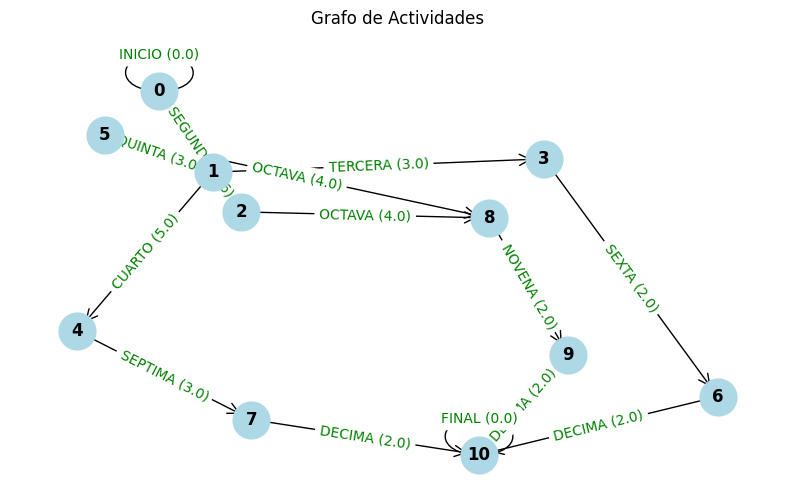

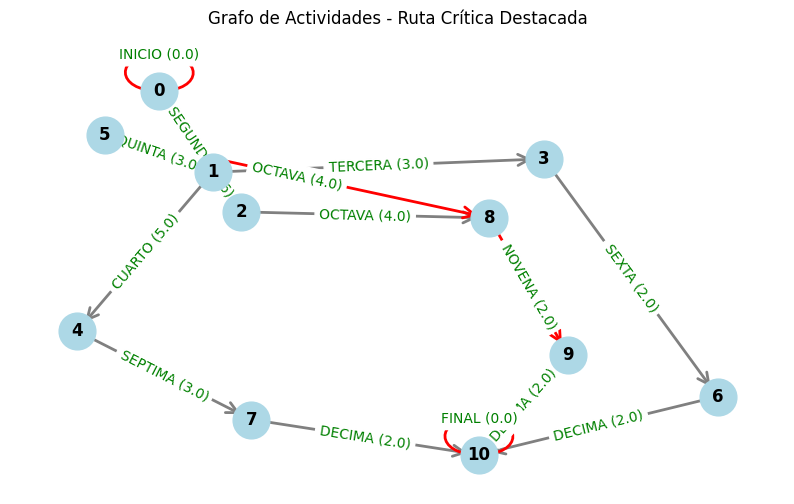

In [6]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------
# Función auxiliar para extraer los eventos i y j
# ---------------------------
def parse_par(par_str):
    # Se asume que la cadena tiene el formato "(i,j)"
    par_str = par_str.strip()[1:-1]  # quita los paréntesis
    i_str, j_str = par_str.split(',')
    return int(i_str), int(j_str)

# ---------------------------
# 1. Leer el archivo CSV con los datos de actividades
# ---------------------------
df = pd.read_csv("actividades.csv", encoding="utf-8")
print("Datos leídos de 'actividades.csv':")
display(df)

# ---------------------------
# 2. Construir la lista de actividades (arcos) y el conjunto de eventos
# ---------------------------
arcs = []    # Cada actividad se guardará como un diccionario con:
             # 'Nodo', 'Actividad', 't_i', 'Predecesor', 'i' y 'j'
event_set = set()

for idx, row in df.iterrows():
    i_event, j_event = parse_par(row["Par ordenado (i,j)"])
    t_i = float(row["Tiempo de actividad (t_i)"])
    arc = {
        "Nodo": row["Nodo"],
        "Actividad": row["Actividad"],
        "t_i": t_i,
        "Predecesor": row["Predecesor"],
        "i": i_event,
        "j": j_event
    }
    arcs.append(arc)
    event_set.add(i_event)
    event_set.add(j_event)

# Se ordenan los eventos (por ejemplo, 0, 1, 2, ...)
events = sorted(list(event_set))

# ---------------------------
# 3. Cálculo del tiempo más temprano (forward pass)
# ---------------------------
# ES: Earliest Start (tiempo más temprano) para cada evento.
ES = {e: 0 for e in events}  # Se asume que el evento 0 (INICIO) tiene ES = 0

for e in events:
    # Para cada arco que parte del evento e
    for arc in [a for a in arcs if a["i"] == e]:
        candidate = ES[e] + arc["t_i"]
        if candidate > ES[arc["j"]]:
            ES[arc["j"]] = candidate

# ---------------------------
# 4. Cálculo del tiempo más tardío (backward pass)
# ---------------------------
# LF: Latest Finish (tiempo más tardío) para cada evento.
LF = {e: np.inf for e in events}
final_event = max(events)  # se toma el mayor como evento FINAL
LF[final_event] = ES[final_event]

for e in sorted(events, reverse=True):
    for arc in [a for a in arcs if a["j"] == e]:
        candidate = LF[e] - arc["t_i"]
        if candidate < LF[arc["i"]]:
            LF[arc["i"]] = candidate

# Si algún LF sigue en infinito (no conectado), se iguala a su ES.
for e in events:
    if LF[e] == np.inf:
        LF[e] = ES[e]

# ---------------------------
# 5. Calcular para cada actividad los tiempos y determinar si es crítica
# ---------------------------
# Se calculan:
#   TIP = ES del evento de inicio del arco.
#   TTP = TIP + t_i (Tiempo de Terminación Previo).
#   TTT = LF del evento final del arco.
#   TIT = TTT - t_i (Tiempo de Inicio Tardío).
#   Holgura total = TIT - TIP (o TTT - TTP).
# Se marca la actividad como crítica si su holgura total es 0 (con tolerancia).
for arc in arcs:
    arc["TIP"] = ES[arc["i"]]
    arc["TTP"] = arc["TIP"] + arc["t_i"]
    arc["TTT"] = LF[arc["j"]]
    arc["TIT"] = arc["TTT"] - arc["t_i"]
    arc["Holgura total"] = arc["TIT"] - arc["TIP"]
    arc["critical"] = (abs(arc["Holgura total"]) < 1e-6)  # Se usa tolerancia para números flotantes

# ---------------------------
# 6. Construcción del grafo con NetworkX
# ---------------------------
G = nx.DiGraph()

# Se agregan las aristas (actividades) al grafo utilizando los eventos como nodos.
# La etiqueta de cada arista incluye el nombre de la actividad y su duración.
for arc in arcs:
    label = f"{arc['Actividad']} ({arc['t_i']})"
    G.add_edge(arc["i"], arc["j"], label=label, critical=arc["critical"])

# Se genera un layout (posición) para los nodos; se puede usar spring_layout, shell_layout, etc.
pos = nx.spring_layout(G, seed=42)

# ---------------------------
# 7. Grafo completo de las actividades
# ---------------------------
plt.figure(figsize=(10,6))
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
nx.draw_networkx_edges(G, pos, arrows=True, arrowstyle='->', arrowsize=20)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green')
plt.title("Grafo de Actividades")
plt.axis("off")
plt.show()

# ---------------------------
# 8. Grafo con la Ruta Crítica destacada
# Se asigna un color a cada arista: rojo para las críticas, gris para las demás.
edge_colors = []
for u, v, data in G.edges(data=True):
    if data["critical"]:
        edge_colors.append("red")
    else:
        edge_colors.append("gray")

plt.figure(figsize=(10,6))
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
nx.draw_networkx_edges(G, pos, arrowstyle='->', arrowsize=20, edge_color=edge_colors, width=2)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green')
plt.title("Grafo de Actividades - Ruta Crítica Destacada")
plt.axis("off")
plt.show()


In [7]:
import csv

def get_int(prompt):
    while True:
        try:
            return int(input(prompt))
        except ValueError:
            print("Error: Ingresa un número entero.")

def get_float(prompt):
    while True:
        try:
            return float(input(prompt))
        except ValueError:
            print("Error: Ingresa un número (entero o decimal).")

def get_uppercase(prompt):
    while True:
        s = input(prompt).strip()
        if s.isalpha() and s == s.upper():
            return s
        else:
            print("Error: Ingresa solo letras mayúsculas.")

def get_string(prompt):
    return input(prompt).strip()

def main():
    filas = []
    
    # Nodo INICIO
    inicio_j = 0
    filas.append({
        "Nodo": "INICIO",
        "Par ordenado (i,j)": f"({inicio_j},{inicio_j})",
        "Tiempo de actividad (t_i)": 0,
        "Predecesor": "",
        "Actividad": "INICIO"
    })
    
    # Variable global para asignar el nuevo "j" y diccionario para obtener la coordenada final de un nodo predecesor
    current_j = inicio_j
    pred_mapping = {"INICIO": inicio_j}
    
    # Se pide el número de nodos (actividades) intermedias (sin contar INICIO y FINAL)
    num_nodos = get_int("Ingrese el número de nodos (actividades): ")
    
    # Se recorre cada nodo a ingresar
    for idx in range(num_nodos):
        print(f"\n--- Ingreso de datos para la actividad {idx+1} ---")
        nodo = get_uppercase("Ingrese el nombre del nodo (solo letras mayúsculas): ")
        actividad = get_string("Ingrese el nombre de la actividad: ")
        num_predecesores = get_int("Ingrese el número de actividades (nodos) predecesoras: ")
        # Se solicita la duración de la actividad actual (t_i)
        duracion = get_float("Ingrese la duración de la actividad: ")
        
        # Se asigna un nuevo valor de "j" para este nodo (único para la actividad)
        new_j = current_j + 1
        
        if num_predecesores == 0:
            # Dependencia solo de INICIO: se toma el "j" de INICIO que es 0
            i_val = pred_mapping["INICIO"]
            filas.append({
                "Nodo": nodo,
                "Par ordenado (i,j)": f"({i_val},{new_j})",
                "Tiempo de actividad (t_i)": duracion,
                "Predecesor": "INICIO",
                "Actividad": actividad
            })
        elif num_predecesores == 1:
            # Se pregunta el nombre del predecesor
            pred = get_uppercase("Ingrese el nombre del nodo predecesor: ")
            # Se solicita la duración de la actividad del nodo predecesor
            pred_dur = get_float(f"Ingrese la duración de la actividad (nodo) {pred}: ")
            if pred in pred_mapping:
                i_val = pred_mapping[pred]
            else:
                print(f"Advertencia: Predecesor {pred} no encontrado. Se usará INICIO por defecto.")
                i_val = pred_mapping["INICIO"]
            filas.append({
                "Nodo": nodo,
                "Par ordenado (i,j)": f"({i_val},{new_j})",
                "Tiempo de actividad (t_i)": duracion,
                "Predecesor": f"{pred} (dur: {pred_dur})",
                "Actividad": actividad
            })
        elif num_predecesores >= 2:
            # Para cada predecesor se pregunta su nombre y también la duración
            for i in range(num_predecesores):
                pred = get_uppercase(f"Ingrese el nombre del nodo predecesor {i+1}: ")
                pred_dur = get_float(f"Ingrese la duración de la actividad (nodo) {pred}: ")
                if pred in pred_mapping:
                    i_val = pred_mapping[pred]
                else:
                    print(f"Advertencia: Predecesor {pred} no encontrado. Se usará INICIO por defecto.")
                    i_val = pred_mapping["INICIO"]
                filas.append({
                    "Nodo": nodo,
                    "Par ordenado (i,j)": f"({i_val},{new_j})",
                    "Tiempo de actividad (t_i)": duracion,
                    "Predecesor": f"{pred} (dur: {pred_dur})",
                    "Actividad": actividad
                })
        
        # Se actualiza el diccionario con el "j" asignado a este nodo y se actualiza el contador global
        pred_mapping[nodo] = new_j
        current_j = new_j
    
    # Nodo FINAL: se asigna tomando la "j" del nodo (actividad) predecesor.
    print("\n--- Nodo FINAL ---")
    final_actividad = get_string("Ingrese el nombre de la actividad para el nodo FINAL: ")
    # Se toma como predecesor el último nodo ingresado, y se utiliza su "j" asignado
    final_predecesor = nodo if num_nodos > 0 else "INICIO"
    final_j = pred_mapping[final_predecesor]
    filas.append({
        "Nodo": "FINAL",
        "Par ordenado (i,j)": f"({final_j},{final_j})",
        "Tiempo de actividad (t_i)": 0,
        "Predecesor": final_predecesor,
        "Actividad": final_actividad
    })
    
    # Se escribe toda la información en un archivo CSV
    nombre_archivo = "actividades.csv"
    with open(nombre_archivo, mode='w', newline='', encoding='utf-8') as archivo_csv:
        campos = ["Nodo", "Par ordenado (i,j)", "Tiempo de actividad (t_i)", "Predecesor", "Actividad"]
        escritor = csv.DictWriter(archivo_csv, fieldnames=campos)
        escritor.writeheader()
        for fila in filas:
            escritor.writerow(fila)
    
    print(f"\nLa información se ha guardado correctamente en el archivo '{nombre_archivo}'.")

if __name__ == "__main__":
    main()


Ingrese el número de nodos (actividades):  5



--- Ingreso de datos para la actividad 1 ---


Ingrese el nombre del nodo (solo letras mayúsculas):  A
Ingrese el nombre de la actividad:  PRIMERA
Ingrese el número de actividades (nodos) predecesoras:  0
Ingrese la duración de la actividad:  6



--- Ingreso de datos para la actividad 2 ---


Ingrese el nombre del nodo (solo letras mayúsculas):  B
Ingrese el nombre de la actividad:  SEGUNDA
Ingrese el número de actividades (nodos) predecesoras:  0
Ingrese la duración de la actividad:  1.6



--- Ingreso de datos para la actividad 3 ---


Ingrese el nombre del nodo (solo letras mayúsculas):  C
Ingrese el nombre de la actividad:  TERCERA
Ingrese el número de actividades (nodos) predecesoras:  A


Error: Ingresa un número entero.


Ingrese el número de actividades (nodos) predecesoras:  1
Ingrese la duración de la actividad:  3
Ingrese el nombre del nodo predecesor:  A
Ingrese la duración de la actividad (nodo) A:  3



--- Ingreso de datos para la actividad 4 ---


Ingrese el nombre del nodo (solo letras mayúsculas):  J
Ingrese el nombre de la actividad:  XY
Ingrese el número de actividades (nodos) predecesoras:  2
Ingrese la duración de la actividad:  4
Ingrese el nombre del nodo predecesor 1:  A
Ingrese la duración de la actividad (nodo) A:  4
Ingrese el nombre del nodo predecesor 2:  B
Ingrese la duración de la actividad (nodo) B:  5



--- Ingreso de datos para la actividad 5 ---


Ingrese el nombre del nodo (solo letras mayúsculas):  J
Ingrese el nombre de la actividad:  DF
Ingrese el número de actividades (nodos) predecesoras:  0
Ingrese la duración de la actividad:  667



--- Nodo FINAL ---


Ingrese el nombre de la actividad para el nodo FINAL:  FINAL



La información se ha guardado correctamente en el archivo 'actividades.csv'.
